# Linear Regression

- Y = a + bx + b1 x1 + b2 x2......
- Y => dependent/target (1) [1D]
- X => independent/features (n) [2D]

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [29]:
#independent values
time = np.array([5,7,12,16,20]).reshape(-1,1)

In [30]:
#dependent values
mass = np.array([40,120,180,210,240])

In [31]:
mymodel = LinearRegression()
#model.fit(independent,dependent)
mymodel.fit(time,mass)

LinearRegression()

In [33]:
x = int(input("Enter the time in minutes : "))
result = mymodel.predict([[x]]) #passing independent variable(time in 2D)
print("if the time is ",x,"minutes the mass is",result[0],"grams")

Enter the time in minutes :  40


if the time is  40 minutes the mass is 499.81818181818187 grams


# Linear Regression on large data

Case : Predicting the salary from age,experience,gender,education

1. Import Libraries
2. Load data
3. Split data
4. Create and train model
5. Test the model
6. Evaluation

In [34]:
mass_model = mymodel.predict(time)
print(mass_model)
                        

[ 72.54545455  96.96103896 158.         206.83116883 255.66233766]


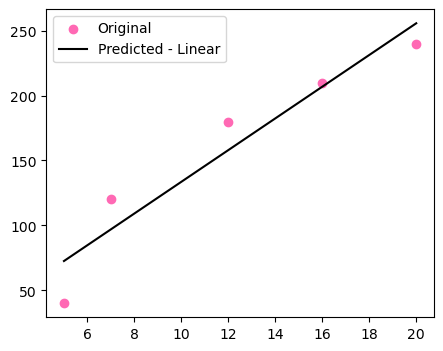

In [35]:
#plotting original values - scatter
import matplotlib.pyplot as plt
plt.figure(figsize = (5,4))
plt.scatter(time,mass,label = "Original", color = "hotpink")
#plotting model values - line
plt.plot(time,mass_model,label = "Predicted - Linear", color = "k")
plt.legend()
plt.show()

R-Square
- Larger, the better

In [36]:
r2score = r2_score(time,mass_model)
print(r2score)

-816.6925282509699


MSE
- Lower the better

In [40]:
mse = mean_squared_error(time,mass_model)
print(mse)

25184.929870129872


MAE
- Lower the better

In [41]:
mae = mean_absolute_error(time,mass_model)
print(mae)

146.0


In [50]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [47]:
df=pd.read_csv(r"C:\Mypythonfiles\Salary_EDA.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0


Clean Data

In [60]:
df.isnull().sum()

Age                        2
Gender                     4
Education Level            3
Job Title                  5
Years of Experience        2
Salary                     3
Gender_encoded             0
Education_Level_encoded    0
dtype: int64

In [62]:
df.dropna(inplace = True)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encoded,Education_Level_encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0


In [63]:
df.isnull().sum()

Age                        0
Gender                     0
Education Level            0
Job Title                  0
Years of Experience        0
Salary                     0
Gender_encoded             0
Education_Level_encoded    0
dtype: int64

In [64]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encoded,Education_Level_encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0


Data Preprocessing

In [88]:
# encoding gender
g_e = LabelEncoder()
df['Gender_encoded'] = g_e.fit_transform(df['Gender'])
edu_le = LabelEncoder()
df['Education_Level_encoded'] = edu_le.fit_transform(df['Education Level'])
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Gender_encoded,Education_Level_encoded
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,1,0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,0,1
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,1,2
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0
4,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,0,0


# Split Data

In [89]:
x = df[['Age','Gender_encoded','Education_Level_encoded','Years of Experience']]
y = df['Salary']

Split-train and test

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)
#total 700 records
#x_train- 560(age,ge,e)
#x_test- 140(age,ge,e)
#y_train- 560(sal)
#y_test- 140(sal)


Create and train model

In [91]:
salary_model = LinearRegression()
salary_model.fit(x_train,y_train)

LinearRegression()

In [92]:
a = float(input("Enter your age: "))
g_user = input("Enter your gender: ")
ed_user = input("Enter your educational level: ")
Exp = float(input("Enter your experience in years: "))


Enter your age:  34
Enter your gender:  Male
Enter your educational level:  PhD
Enter your experience in years:  12


In [95]:
gen_enc = g_e.transform([g_user])[0]
edu_enc = edu_le.transform([ed_user])[0]
print(gen_enc,edu_enc) 

1 2


In [96]:
result = salary_model.predict([[a,gen_enc,edu_enc,Exp]]) #passing independent variable(time in 2D)
print("the predicted salary is : ",result[0])

the predicted salary is :  119917.1432632611


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


 # Evaluation

1. predict test values
2. visualize
3. metrics

In [99]:
model_predictions = salary_model.predict(x_test)

1.visualize

In [100]:
len(y_test)

74

In [101]:
len(x_test)

74

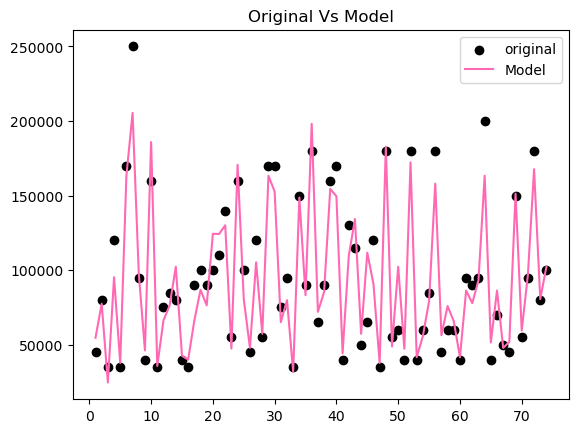

In [103]:
#plotting original values
plt.scatter(np.arange(1,75), y_test, color = 'k', label= 'original')
plt.plot(np.arange(1,75),model_predictions, color = 'hotpink', label = 'Model')
plt.title("Original Vs Model")
plt.legend()
plt.show()

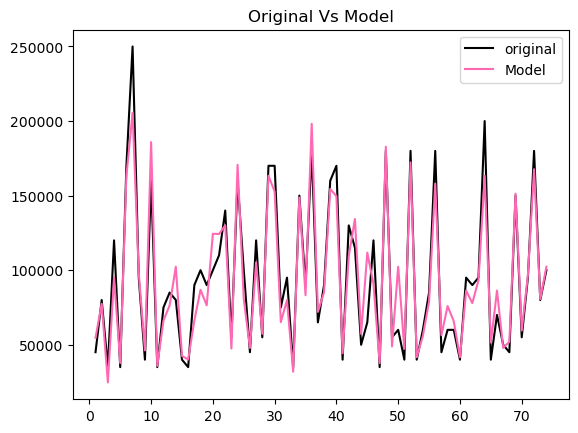

In [104]:
plt.plot(np.arange(1,75), y_test, color = 'k', label= 'original')
plt.plot(np.arange(1,75),model_predictions, color = 'hotpink', label = 'Model')
plt.title("Original Vs Model")
plt.legend()
plt.show()